In [58]:
from whisperweranalysis.structure import HvdSet
from whisperweranalysis.groundtruth import hvd_sentences
from whisperweranalysis.utilities import get_statistics_of_wer, get_all_values
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [59]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
hvd_set1 = HvdSet(1, hvd_sentences)

In [61]:
hvd_set1.compute_wer('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [62]:
from whisperweranalysis.structure import MultipleSets
hvd_sets = MultipleSets('/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/whisperweranalysis/transcription')

In [63]:
hvd_sets[0]

HvdSet(72, 711, 720)

In [64]:
sets = [x[0] for x in hvd_sets.get_all_models_wer()['Glow'][:10]]

In [65]:
glow_adv = [hvd_sets[x] for x in sets]

In [66]:
glow_adv

[HvdSet(5, 41, 50),
 HvdSet(25, 241, 250),
 HvdSet(26, 251, 260),
 HvdSet(31, 301, 310),
 HvdSet(39, 381, 390),
 HvdSet(50, 491, 500),
 HvdSet(51, 501, 510),
 HvdSet(53, 521, 530),
 HvdSet(55, 541, 550),
 HvdSet(67, 661, 670)]

In [67]:
glow_adv[9], glow_adv[9].transcriptions

(HvdSet(67, 661, 670),
 {'NH2': ['Hang tinsel from both branches.',
   'Cap the jar with a tight brass cover.',
   'The poor boy missed the boat again.',
   'Be sure to set that lamp firmly in the hole.',
   'pick a card and slip it under the pack.',
   'Around Matt will cover the dull spot.',
   'The first part of the plan needs changing.',
   'A good book informs of what we ought to know.',
   'The mail comes in three batches per day.',
   'You cannot brew tea in a cold pot.'],
  'NeuralFHMM_NS_150k': ['hang tinsel from both branches.',
   'Cap the jar with a tight brass cover.',
   'The poor boy missed the boat again.',
   'Be sure to set that lamp firmly in the hole.',
   'Pick a card and slip it under the pack.',
   'A round mat will cover the dull spot.',
   'the first part of the plan needs changing.',
   'a good book informs of what we ought to know.',
   'The mail comes in three batches per day.',
   'You cannot brew tea in a cold pot.'],
  'NeuralFHMM_ND_150k': ['hang tinsel 

In [68]:
from whisperweranalysis.utilities import get_all_values


systems_glow_adv = get_all_values([hvd_sets[x] for x in sets])

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


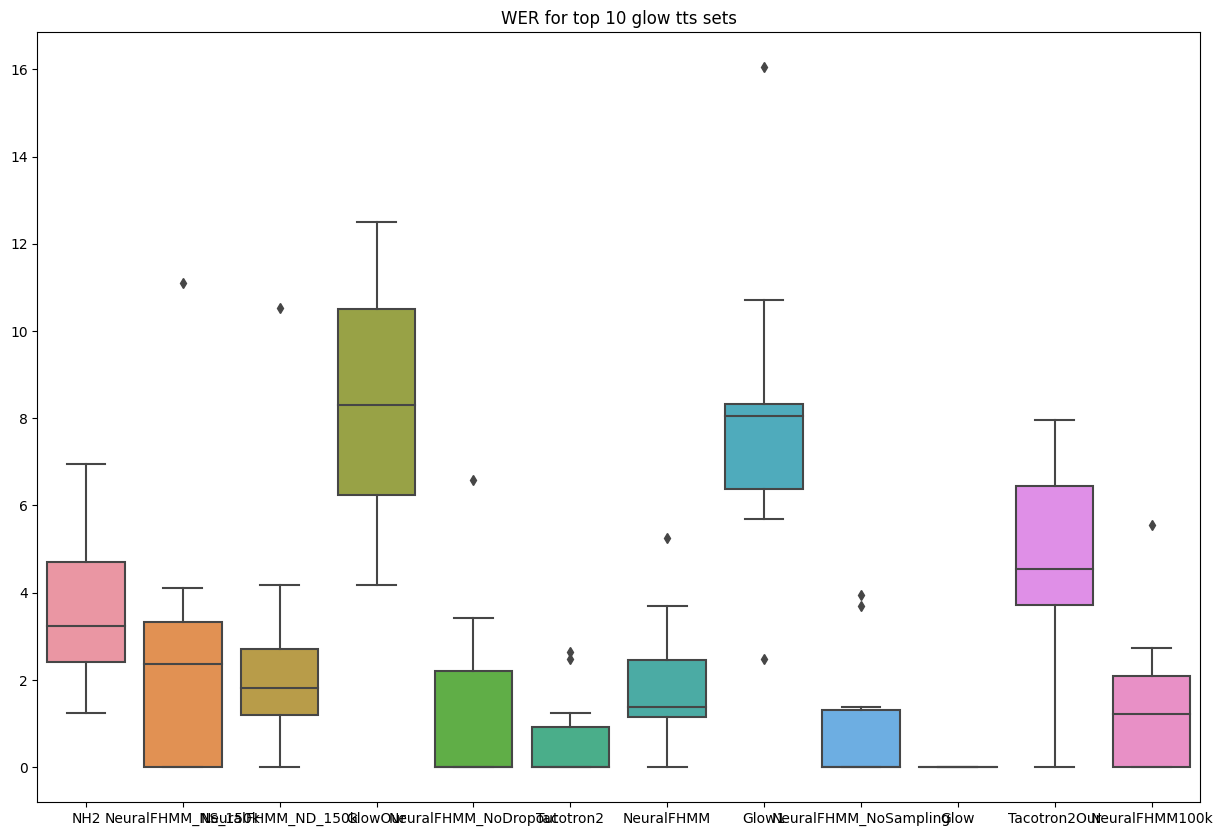

In [69]:


df = pd.DataFrame.from_dict(systems_glow_adv)

fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title('WER for top 10 glow tts sets')
sns.boxplot(data=df, ax=ax)
plt.show()

In [70]:
top_10 = hvd_sets.get_top_n(10)

In [71]:
top_10

[HvdSet(34, 331, 340),
 HvdSet(39, 381, 390),
 HvdSet(47, 461, 470),
 HvdSet(49, 481, 490),
 HvdSet(50, 491, 500),
 HvdSet(51, 501, 510),
 HvdSet(63, 621, 630),
 HvdSet(66, 651, 660),
 HvdSet(71, 701, 710),
 HvdSet(72, 711, 720)]

In [72]:
top_10[4], top_10[4].transcriptions

(HvdSet(50, 491, 500),
 {'NH2': ['a man in a blue sweater sat at the desk.',
   'of Saurav food eaten by horse and men.',
   'Their eyelids droop for want of sleep.',
   'A sip of tea revives his tired friend.',
   'There are many ways to do these things.',
   'Tuck the sheet under the edge of the mat.',
   'a force equal to that would move the earth.',
   'We like to see clear weather.',
   'The work of the tailor is seen on each side.',
   'Take a chance and win a China doll.'],
  'NeuralFHMM_NS_150k': ['A man in a blue sweater sat at the desk.',
   'Oats are a food eaten by horse and man.',
   'Their eyelids droop for want of sleep.',
   'A sip of tea revives his tired friend.',
   'There are many ways to do these things.',
   'Tuck the sheet under the edge of the mat.',
   'a force equal to that would move the earth.',
   'We like to see clear weather.',
   'The work of the tailor is seen on each side.',
   'Take a chance and win a China doll.'],
  'NeuralFHMM_ND_150k': ['A man in 

In [73]:
get_statistics_of_wer(hvd_sets)

({'NH2': 5.732202532726272,
  'NeuralFHMM_NS_150k': 3.234996782115126,
  'NeuralFHMM_ND_150k': 4.312041533115923,
  'GlowOur': 11.572721721339118,
  'NeuralFHMM_NoDropout': 3.077164322760187,
  'Tacotron2': 2.1838669295304816,
  'NeuralFHMM': 3.651411874362311,
  'Glow1': 9.747917656302901,
  'NeuralFHMM_NoSampling': 2.21044557496172,
  'Glow': 2.775639031486259,
  'Tacotron2Our': 6.360939798900698,
  'NeuralFHMM100k': 3.1270758821639393},
 {'NH2': 3.1291143771582135,
  'NeuralFHMM_NS_150k': 2.417446492970459,
  'NeuralFHMM_ND_150k': 2.843611738011418,
  'GlowOur': 4.382714138472633,
  'NeuralFHMM_NoDropout': 2.2665125871859613,
  'Tacotron2': 2.101733245429217,
  'NeuralFHMM': 2.566491022365719,
  'Glow1': 4.155369188907029,
  'NeuralFHMM_NoSampling': 1.8439383673575858,
  'Glow': 2.2100981225706153,
  'Tacotron2Our': 3.143415080361446,
  'NeuralFHMM100k': 2.6930398165634304})

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


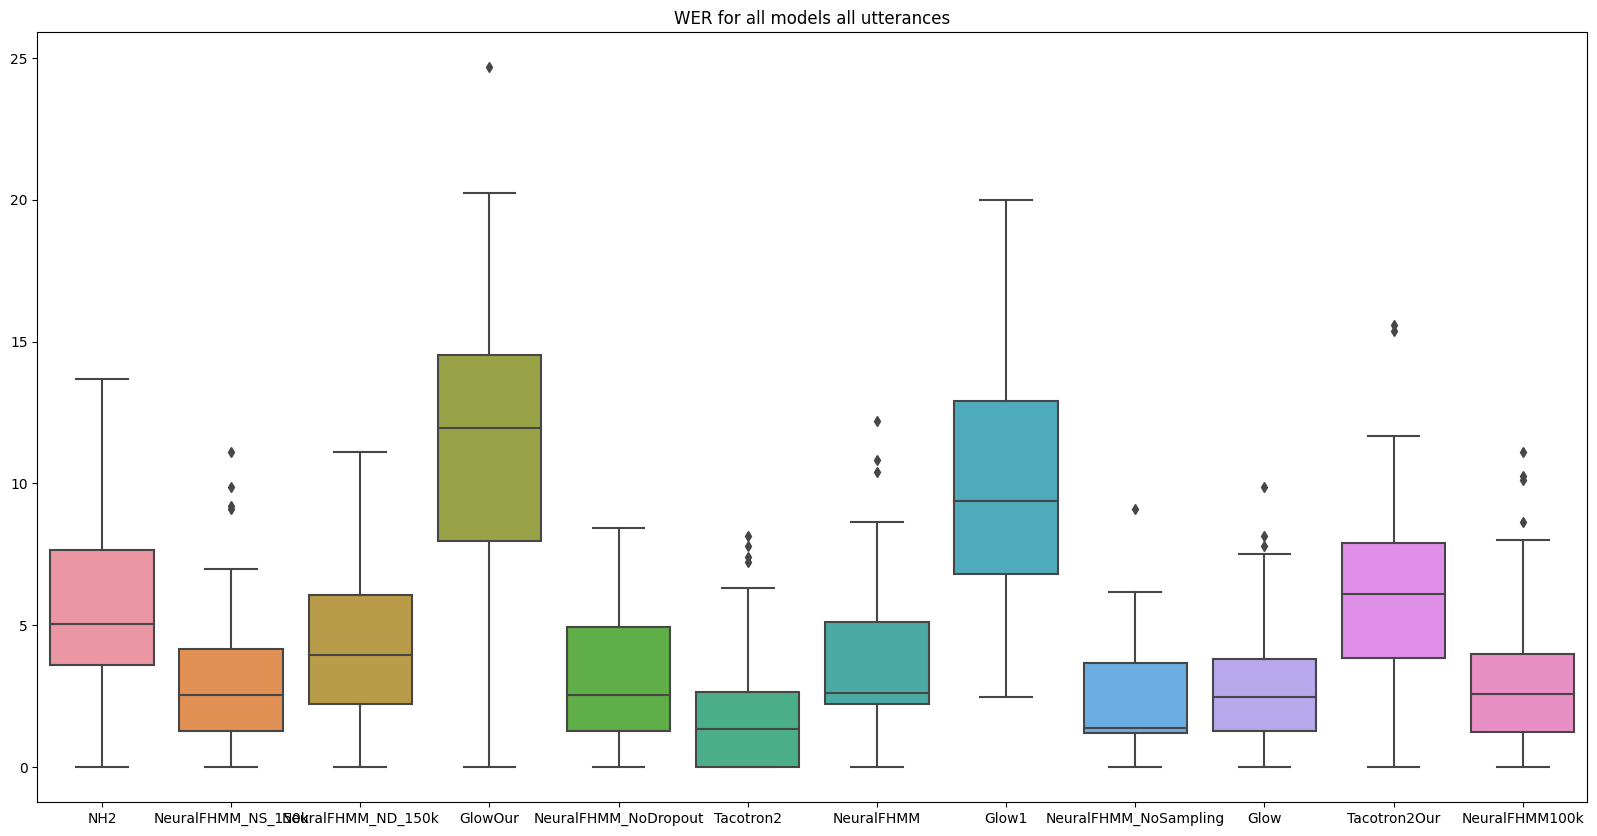

/home/shivam/Projects/analysis-scripts/WhisperWERAnalysis/.venv/lib/python3.8/site-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


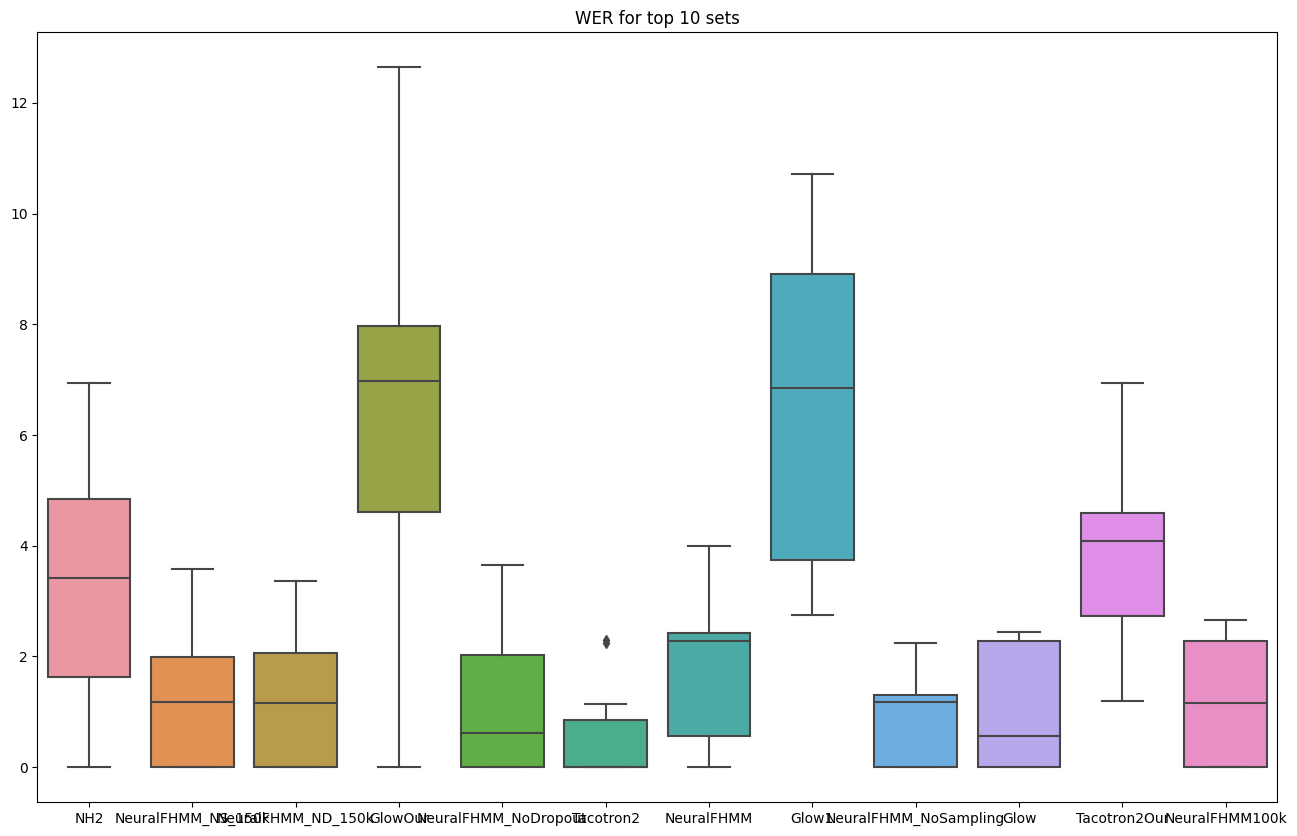

In [77]:
all_wer = get_all_values(hvd_sets)
df = pd.DataFrame.from_dict(all_wer)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('WER for all models all utterances')
sns.boxplot(data=df, ax=ax)
plt.show()




top_10_wer = get_all_values(top_10)
df = pd.DataFrame.from_dict(top_10_wer)

fig, ax = plt.subplots(figsize=(16, 10))
ax.set_title('WER for top 10 sets')
sns.boxplot(data=df, ax=ax)
plt.show()

In [75]:
get_statistics_of_wer(hvd_sets)

({'NH2': 5.732202532726272,
  'NeuralFHMM_NS_150k': 3.234996782115126,
  'NeuralFHMM_ND_150k': 4.312041533115923,
  'GlowOur': 11.572721721339118,
  'NeuralFHMM_NoDropout': 3.077164322760187,
  'Tacotron2': 2.1838669295304816,
  'NeuralFHMM': 3.651411874362311,
  'Glow1': 9.747917656302901,
  'NeuralFHMM_NoSampling': 2.21044557496172,
  'Glow': 2.775639031486259,
  'Tacotron2Our': 6.360939798900698,
  'NeuralFHMM100k': 3.1270758821639393},
 {'NH2': 3.1291143771582135,
  'NeuralFHMM_NS_150k': 2.417446492970459,
  'NeuralFHMM_ND_150k': 2.843611738011418,
  'GlowOur': 4.382714138472633,
  'NeuralFHMM_NoDropout': 2.2665125871859613,
  'Tacotron2': 2.101733245429217,
  'NeuralFHMM': 2.566491022365719,
  'Glow1': 4.155369188907029,
  'NeuralFHMM_NoSampling': 1.8439383673575858,
  'Glow': 2.2100981225706153,
  'Tacotron2Our': 3.143415080361446,
  'NeuralFHMM100k': 2.6930398165634304})

In [76]:
{key: value[3] for key, value in top_10[2].transcriptions.items()}

{'NH2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_NS_150k': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM_ND_150k': 'He sent the figs, but kept the ripe cherries.',
 'GlowOur': 'He sent the fakes but kept the rot cherries.',
 'NeuralFHMM_NoDropout': 'He sent the figs but kept the ripe cherries.',
 'Tacotron2': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM': 'He sent the figs, but kept the ripe cherries.',
 'Glow1': 'He sent the fates, but kept the ripe cherries.',
 'NeuralFHMM_NoSampling': 'He sent the figs but kept the ripe cherries.',
 'Glow': 'He sent the fakes, but kept the right cherries.',
 'Tacotron2Our': 'He sent the figs, but kept the ripe cherries.',
 'NeuralFHMM100k': 'He sent the figs, but kept the ripe cherries.'}